In [3]:
import os
import shutil  # https://docs.python.org/3/library/shutil.html
from shutil import unpack_archive  # to unzip
# from shutil import make_archive # to create zip for storage
import requests  # for downloading zip file
from scipy import io  # for loadmat, matlab conversion
import numpy as np
import urllib.request # to get files from web w/o !wget

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def get_shapes(np_arr_list):
    """Returns text, each line is shape and dtype for numpy array in list
       example: print(get_shapes([X_train, X_test, y_train, y_test]))"""
    shapes = ""
    for i in np_arr_list:
        my_name = namestr(i,globals())
        shapes += (my_name[0] + " shape is " + str(i.shape) \
            + " data type is " + str(i.dtype) + "\n")
    return shapes

In [4]:
def get_py_file(fname, url):
    """checks for local file, if none downloads from URL.
    :return: nothing"""
    if (os.path.exists(fname)):
        print ("Local",fname, "found, skipping download")
    else:
        print("Downloading",fname, "from IMICS git repo")
        urllib.request.urlretrieve(url, filename=fname)

get_py_file(fname = 'load_data_utils.py', url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/load_data_utils.py')


In [7]:
!gdown "1P5PIYeYvbfL4kQj-P2sm-JquUIddAxec&confirm=t" # ADL_Leotta_2021.zip
get_py_file(fname = 'leotta_2021_load_dataset.py',
            url = 'https://raw.githubusercontent.com/imics-lab/load_data_time_series/main/ADL/Leotta_2021/leotta_2021_load_dataset.py')
    #full_filename = my_path+os.path.join('/ADL/Leotta_2021/'+'leotta_2021_load_dataset.py')
    #shutil.copy(full_filename,'leotta_2021_load_dataset.py')
import leotta_2021_load_dataset as leotta
# Load the dataset without one-hot encoding
x_train, y_train, x_valid, y_valid, x_test, y_test = leotta.leotta_2021_load_dataset(incl_val_group=True, one_hot_encode=False)

# Perform one-hot encoding manually
from sklearn.preprocessing import OneHotEncoder

# Assuming 'label_map_leotta' is accessible for getting the number of labels
label_map = leotta.label_map_leotta
num_labels = len(label_map['label'])
all_categories = [[str(i) for i in range(num_labels)]]

enc = OneHotEncoder(categories=all_categories, sparse_output=False)

# Reshape y values to 2D array for encoding and then reshape back
y_train_oh = enc.fit_transform(y_train.reshape(-1, 1))
y_valid_oh = enc.transform(y_valid.reshape(-1, 1))
y_test_oh = enc.transform(y_test.reshape(-1, 1))

t_names = list(leotta_2021_load_dataset.label_map_leotta.get('label').keys())

Downloading...
From: https://drive.google.com/uc?id=1P5PIYeYvbfL4kQj-P2sm-JquUIddAxec&confirm=t
To: /content/ADL_Leotta_2021.zip
100% 258M/258M [00:01<00:00, 183MB/s]
Local leotta_2021_load_dataset.py found, skipping download
Using existing Leotta archive in ./dataset


/content/load_data_transforms.py:134: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[label_name] = df[label_name].replace(label_mapping_dict[label_name])
/content/load_data_transforms.py:134: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[label_name] = df[label_name].replace(label_mapping_dict[label_name])
/content/load_data_transforms.py:134: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

In [21]:
import leotta_2021_load_dataset as leotta

# Load the dataset without one-hot encoding
x_train, y_train, x_valid, y_valid, x_test, y_test = leotta.leotta_2021_load_dataset(incl_val_group=True, one_hot_encode=False)

# Ensure the shapes are as expected
print(f"X_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {x_valid.shape}, y_valid shape: {y_valid.shape}")
print(f"X_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Calculate and print the number of classes
n_classes = len(np.unique(y_train))
print(f"Number of classes: {n_classes}")


Using existing Leotta archive in ./dataset


/content/load_data_transforms.py:134: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[label_name] = df[label_name].replace(label_mapping_dict[label_name])
/content/load_data_transforms.py:134: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[label_name] = df[label_name].replace(label_mapping_dict[label_name])
/content/load_data_transforms.py:134: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

X_train shape: (3733, 300, 3), y_train shape: (3733, 1)
X_valid shape: (1755, 300, 3), y_valid shape: (1755, 1)
X_test shape: (1987, 300, 3), y_test shape: (1987, 1)
Number of classes: 18


In [20]:
# Number of classes
n_classes = len(np.unique(y_train))
print(f"X_train shape: {x_train.shape}, y_train shape: {y_train_oh.shape}")
print(f"X_valid shape: {x_valid.shape}, y_valid shape: {y_valid_oh.shape}")
print(f"X_test shape: {x_test.shape}, y_test shape: {y_test_oh.shape}")
print(f"Number of classes: {n_classes}")

X_train shape: (3733, 300, 3), y_train shape: (3733, 18)
X_valid shape: (1755, 300, 3), y_valid shape: (1755, 18)
X_test shape: (1987, 300, 3), y_test shape: (1987, 18)
Number of classes: 18


## 2. Data Preprocessing

In [12]:
!pip install torchinfo

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
from torchinfo import summary

### Load the train, validation, and test sets into PyTorch DataLoaders

In [22]:
X_train = torch.tensor(x_train, dtype=torch.float32)
Y_train = torch.tensor(y_train, dtype=torch.int64)

X_valid = torch.tensor(x_valid, dtype=torch.float32)
Y_valid = torch.tensor(y_valid, dtype=torch.int64)

X_test = torch.tensor(x_test, dtype=torch.float32)
Y_test = torch.tensor(y_test, dtype=torch.int64)

# DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

valid_dataset = TensorDataset(X_valid, Y_valid)
valid_loader = DataLoader(
    valid_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

test_dataset = TensorDataset(X_test, Y_test)
test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

## 3. Model Building

The `TimeSeriesPatchEmbeddingLayer` class is a PyTorch module used to create an embedding layer for time series data. It takes as input the number of channels, patch size, embedding dimension, and input timesteps. The class calculates the number of patches and padding needed, and initializes a 1D convolutional layer, class token embeddings, and position embeddings. The forward method pads the input if necessary, applies the convolutional layer, permutes the output, and concatenates the class tokens. Finally, it adds the position embeddings to the output.

In [24]:
import math

class TimeSeriesPatchEmbeddingLayer(nn.Module):
    def __init__(self, in_channels, patch_size, embedding_dim, input_timesteps):
        super().__init__()
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim
        self.in_channels = in_channels

        # Calculate the number of patches, adjusting for padding if necessary
        # Ceiling division to account for padding
        self.num_patches = -(-input_timesteps // patch_size)
        self.padding = (
            self.num_patches * patch_size
        ) - input_timesteps  # Calculate padding length

        self.conv_layer = nn.Conv1d(
            in_channels=in_channels,
            out_channels=embedding_dim,
            kernel_size=patch_size,
            stride=patch_size,
        )

        self.class_token_embeddings = nn.Parameter(
            torch.randn((1, 1, embedding_dim), requires_grad=True)
        )
        self.position_embeddings = PositionalEncoding(embedding_dim, dropout=0.1, max_len=input_timesteps)

    def forward(self, x):
        # Pad the input sequence if necessary
        if self.padding > 0:
            x = nn.functional.pad(x, (0, 0, 0, self.padding))  # Pad the second to last dimension, which is input_timesteps

        # We use a Conv1d layer to generate the patch embeddings
        x = x.permute(0, 2, 1)  # (batch, features, timesteps)
        conv_output = self.conv_layer(x)
        conv_output = conv_output.permute(0, 2, 1)  # (batch, timesteps, features)

        batch_size = x.shape[0]
        class_tokens = self.class_token_embeddings.expand(batch_size, -1, -1)
        output = torch.cat((class_tokens, conv_output), dim=1)

        output = self.position_embeddings(output)

        return output


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

    def pos_encoding(self, q_len, d_model, normalize=True):
        pe = torch.zeros(q_len, d_model)
        position = torch.arange(0, q_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        if normalize:
            pe = pe - pe.mean()
            pe = pe / (pe.std() * 10)
        return pe

    def forward(self, x):
        x = x + self.pos_encoding(q_len = x.size(1), d_model = x.size(2))
        return self.dropout(x)

class LearnedPositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(LearnedPositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.pe = nn.Parameter(torch.randn(1, max_len, d_model))

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)


def get_pos_encoder(pos_encoding):
    if pos_encoding == 'fixed':
        return PositionalEncoding
    elif pos_encoding == 'learned':
        return LearnedPositionalEncoding
    else:
        raise ValueError(f"Unknown positional encoding type: {pos_encoding}")



Let's use the `summary` function to display the architecture of the embedding layer.

In [25]:
random_instances, random_labels = next(iter(train_loader))
random_instance = random_instances[0]

BATCH_SIZE = random_instances.shape[0]
TIMESTEPS = random_instance.shape[0]
CHANNELS = random_instance.shape[1]
PATCH_SIZE = 8

patch_embedding_layer = TimeSeriesPatchEmbeddingLayer(
    in_channels=CHANNELS,
    patch_size=PATCH_SIZE,
    embedding_dim=CHANNELS * PATCH_SIZE,
    input_timesteps=TIMESTEPS,
)

patch_embeddings = patch_embedding_layer(random_instances)
patch_embeddings.shape

summary(
    model=patch_embedding_layer,
    # (batch_size, input_channels, input_timesteps)
    input_size=(BATCH_SIZE, TIMESTEPS, CHANNELS),
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"],
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
TimeSeriesPatchEmbeddingLayer (TimeSeriesPatchEmbeddingLayer)     [64, 300, 3]         [64, 39, 24]         24                   True
├─Conv1d (conv_layer)                                             [64, 3, 304]         [64, 24, 38]         600                  True
├─PositionalEncoding (position_embeddings)                        [64, 39, 24]         [64, 39, 24]         --                   --
│    └─Dropout (dropout)                                          [64, 39, 24]         [64, 39, 24]         --                   --
Total params: 624
Trainable params: 624
Non-trainable params: 0
Total mult-adds (M): 1.46
Input size (MB): 0.23
Forward/backward pass size (MB): 0.47
Params size (MB): 0.00
Estimated Total Size (MB): 0.70

In [26]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_timesteps, in_channels, patch_size, embedding_dim, num_transformer_layers=6, num_heads=8, dim_feedforward=128, dropout=0.1, num_classes=2):
        super().__init__()

        # Embedding layer
        self.patch_embedding = TimeSeriesPatchEmbeddingLayer(in_channels, patch_size, embedding_dim, input_timesteps)

        # Calculate the number of patches
        self.num_patches = -(-input_timesteps // patch_size)

        # Transformer Encoder
        # Setting batch_first=True to accommodate inputs with batch dimension first
        encoder_layers = TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer_encoder = TransformerEncoder(encoder_layer=encoder_layers, num_layers=num_transformer_layers)

        # Feedforward layer
        self.ff_layer = nn.Linear(embedding_dim, dim_feedforward)
        # Classifier Head
        self.classifier = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        # x shape: (batch_size, in_channels, input_timesteps)

        # Get patch embeddings
        x = self.patch_embedding(x)  # Output shape: (batch_size, num_patches + 1, embedding_dim)

        # Apply Transformer Encoder with batch first
        x = self.transformer_encoder(x)  # Output shape: (batch_size, num_patches + 1, embedding_dim)

        # Use the output corresponding to the class token for classification
        class_token_output = x[:, 0, :]  # Select the class token for each item in the batch

        # Feedforward layer
        x = self.ff_layer(class_token_output)

        # Classifier head
        output = self.classifier(x)  # Output shape: (batch_size, num_classes)

        return output


In [27]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=8,
    embedding_dim=32,
    num_transformer_layers=4,
    num_heads=4,
    dim_feedforward=128,
    dropout=0.2,
    num_classes=n_classes,
).to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the learning rate scheduler to reduce the learning rate by the specified step size and factor (gamma) every step_size epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

summary(
    model=model,
    input_size=(BATCH_SIZE, TIMESTEPS, CHANNELS),
    col_names=["input_size", "output_size", "num_params", "trainable"],
    col_width=20,
    row_settings=["var_names"],
)

Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
TimeSeriesTransformer (TimeSeriesTransformer)           [64, 300, 3]         [64, 18]             --                   True
├─TimeSeriesPatchEmbeddingLayer (patch_embedding)       [64, 300, 3]         [64, 39, 32]         32                   True
│    └─Conv1d (conv_layer)                              [64, 3, 304]         [64, 32, 38]         800                  True
│    └─PositionalEncoding (position_embeddings)         [64, 39, 32]         [64, 39, 32]         --                   --
│    │    └─Dropout (dropout)                           [64, 39, 32]         [64, 39, 32]         --                   --
├─TransformerEncoder (transformer_encoder)              [64, 39, 32]         [64, 39, 32]         --                   True
│    └─ModuleList (layers)                              --                   --                   --                   True
│    │ 

## 4. Model Training

In [31]:
# Model, loss function, and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Number of epochs
n_epochs = 100

# Initialize variables for tracking the best model
best_validation_acc = 0.0
best_model_path = 'best_model_v2.pth'

for epoch in range(n_epochs):
    model.train()  # Set model to training mode
    train_losses = []
    train_correct = 0
    total = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients

        predictions = model(inputs)  # Forward pass
        labels = labels.argmax(dim=1)
        loss = criterion(predictions, labels)  # Calculate loss

        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        train_losses.append(loss.item())

        # Count the number of correct predictions
        train_correct += (predictions.argmax(1) == labels).sum().item()
        total += labels.size(0)

    train_loss = np.mean(train_losses)
    train_acc = train_correct / total

    # Validation loop
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        validation_losses = []
        validation_correct = 0
        total_val = 0

        for inputs, labels in valid_loader:
            predictions = model(inputs)
            labels = labels.argmax(dim=1)
            loss = criterion(predictions, labels)
            validation_losses.append(loss.item())

            validation_correct += (predictions.argmax(1) == labels).sum().item()
            total_val += labels.size(0)

        validation_loss = np.mean(validation_losses)
        validation_acc = validation_correct / total_val

    # Check if this is the best model so far
    if validation_acc > best_validation_acc:
        best_validation_acc = validation_acc
        # Save the model
        torch.save(model.state_dict(), best_model_path)
        print(f'Epoch {epoch+1}: New best model saved with validation accuracy: {validation_acc:.4f}')

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {validation_loss:.4f}, Val Acc: {validation_acc:.4f}')

# Loading the best model
model.load_state_dict(torch.load(best_model_path))
print('Loaded best model for testing or further use.')

Epoch 1: New best model saved with validation accuracy: 1.0000
Epoch 1, Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000
Epoch 2, Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000
Epoch 3, Train Loss: 0.0000, Train Acc: 1.0000, Val Loss: 0.0000, Val Acc: 1.0000


KeyboardInterrupt: 

## 5. Model Testing

In [ ]:
# Prediction
model.eval()
with torch.no_grad():
    Y_pred_prob = model(X_test)

Y_pred = Y_pred_prob.argmax(1)

print(classification_report(Y_test, Y_pred))
confusion = confusion_matrix(Y_test, Y_pred)
print(f"Confusion matrix:\n{confusion}")

              precision    recall  f1-score   support

           0       0.51      0.62      0.56        34
           1       0.48      0.57      0.52        47
           2       0.72      0.94      0.81       344
           3       0.99      0.86      0.92       413
           4       0.79      0.59      0.68       184
           5       1.00      0.95      0.97       146
           6       0.76      0.74      0.75       256
           7       0.72      0.69      0.71        68
           8       0.54      0.44      0.48        32

    accuracy                           0.80      1524
   macro avg       0.72      0.71      0.71      1524
weighted avg       0.82      0.80      0.80      1524

Confusion matrix:
[[ 21   8   0   0   0   0   0   1   4]
 [ 10  27   0   0   0   0   0  10   0]
 [  0   0 322   1  21   0   0   0   0]
 [  0   0   0 356   1   0  56   0   0]
 [  0   7  63   0 109   0   5   0   0]
 [  0   0   1   3   4 138   0   0   0]
 [  0   0  64   0   3   0 189   0   0]
 [  

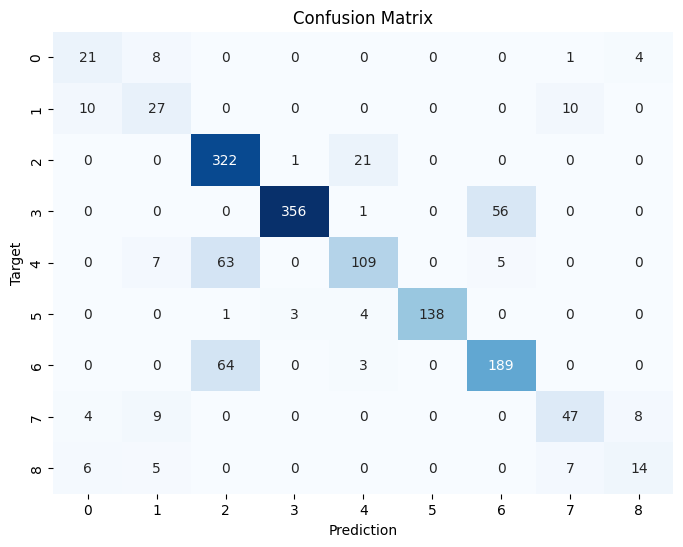

In [ ]:
# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.title("Confusion Matrix")
plt.show()

## Positional Encodings

In [ ]:
!pip install einops

In [ ]:
import torch
import torch.nn as nn
from einops import rearrange
import pandas as pd

class Attention(nn.Module):
    def __init__(self, emb_size, num_heads, dropout):
        super().__init__()
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)
        self.query = nn.Linear(emb_size, emb_size, bias=False)

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        attn = torch.matmul(q, k) * self.scale
        attn = nn.functional.softmax(attn, dim=-1)

        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)
        return out


class Attention_Rel_Scl(nn.Module):
    def __init__(self, emb_size, num_heads, seq_len, dropout):
        super().__init__()
        self.seq_len = seq_len
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)
        self.query = nn.Linear(emb_size, emb_size, bias=False)

        self.relative_bias_table = nn.Parameter(torch.zeros((2 * self.seq_len - 1), num_heads))
        coords = torch.meshgrid((torch.arange(1), torch.arange(self.seq_len)))
        coords = torch.flatten(torch.stack(coords), 1)
        relative_coords = coords[:, :, None] - coords[:, None, :]
        relative_coords[1] += self.seq_len - 1
        relative_coords = rearrange(relative_coords, 'c h w -> h w c')
        relative_index = relative_coords.sum(-1).flatten().unsqueeze(1)
        self.register_buffer("relative_index", relative_index)

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        attn = torch.matmul(q, k) * self.scale
        attn = nn.functional.softmax(attn, dim=-1)

        relative_bias = self.relative_bias_table.gather(0, self.relative_index.repeat(1, 8))
        relative_bias = rearrange(relative_bias, '(h w) c -> 1 c h w', h=1 * self.seq_len, w=1 * self.seq_len)
        attn = attn + relative_bias

        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)
        return out


class Attention_Rel_Vec(nn.Module):
    def __init__(self, emb_size, num_heads, seq_len, dropout):
        super().__init__()
        self.seq_len = seq_len
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)
        self.query = nn.Linear(emb_size, emb_size, bias=False)

        self.Er = nn.Parameter(torch.randn(self.seq_len, int(emb_size / num_heads)))

        self.register_buffer(
            "mask",
            torch.tril(torch.ones(self.seq_len, self.seq_len))
                .unsqueeze(0).unsqueeze(0)
        )

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        QEr = torch.matmul(q, self.Er.transpose(0, 1))
        Srel = self.skew(QEr)

        attn = torch.matmul(q, k)
        attn = (attn + Srel) * self.scale

        attn = nn.functional.softmax(attn, dim=-1)
        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)
        return out

    def skew(self, QEr):
        padded = nn.functional.pad(QEr, (1, 0))
        batch_size, num_heads, num_rows, num_cols = padded.shape
        reshaped = padded.reshape(batch_size, num_heads, num_cols, num_rows)
        Srel = reshaped[:, :, 1:, :]
        return Srel


In [ ]:
class TUPEConfig:
    num_layers: int = 6
    num_heads: int = 8
    d_model: int = 128
    d_head: int = 0
    max_len: int = 256
    dropout: float = 0.1
    expansion_factor: int = 1
    relative_bias: bool = True
    bidirectional_bias: bool = True
    num_buckets: int = 32
    max_distance: int = 128

    def __post_init__(self):
        d_head, remainder = divmod(self.d_model, self.num_heads)
        assert remainder == 0, "`d_model` should be divisible by `num_heads`"
        self.d_head = d_head

In [ ]:
def _get_relative_position_bucket(
    relative_position, bidirectional, num_buckets, max_distance
):
    """
    from https://github.com/huggingface/transformers/blob/master/src/transformers/models/t5/modeling_t5.py
    """
    relative_buckets = 0
    if bidirectional:
        num_buckets //= 2
        relative_buckets += (relative_position > 0).to(torch.long) * num_buckets
        relative_position = torch.abs(relative_position)
    else:
        relative_position = -torch.min(
            relative_position, torch.zeros_like(relative_position)
        )
    # now relative_position is in the range [0, inf)

    # half of the buckets are for exact increments in positions
    max_exact = num_buckets // 2
    is_small = relative_position < max_exact

    # The other half of the buckets are for logarithmically bigger bins in positions up to max_distance
    relative_postion_if_large = max_exact + (
        torch.log(relative_position.float() / max_exact)
        / math.log(max_distance / max_exact)
        * (num_buckets - max_exact)
    ).to(torch.long)
    relative_postion_if_large = torch.min(
        relative_postion_if_large,
        torch.full_like(relative_postion_if_large, num_buckets - 1),
    )

    relative_buckets += torch.where(
        is_small, relative_position, relative_postion_if_large
    )
    return relative_buckets


def get_relative_positions(
    seq_len, bidirectional=True, num_buckets=32, max_distance=128
):
    x = torch.arange(seq_len)[None, :]
    y = torch.arange(seq_len)[:, None]
    relative_positions = _get_relative_position_bucket(
        x - y, bidirectional, num_buckets, max_distance
    )
    return relative_positions

In [ ]:
class TUPEMultiHeadAttention(nn.Module):
    def __init__(self, config: TUPEConfig, pos_embed: nn.Module) -> None:
        super().__init__()
        self.max_len = config.max_len
        self.num_heads = config.num_heads
        self.num_buckets = config.num_buckets
        self.max_distance = config.max_distance
        self.bidirectional = config.bidirectional_bias
        self.scale = math.sqrt(2 * config.d_head)

        self.pos_embed = pos_embed
        self.dropout = nn.Dropout(config.dropout)

        # kqv in one pass
        self.pos_kq = nn.Linear(config.d_model, 2 * config.d_model, bias=False)
        self.tok_kqv = nn.Linear(config.d_model, 3 * config.d_model, bias=False)

        self.relative_bias = config.relative_bias
        if config.relative_bias:
            self.bias = nn.Embedding(config.max_len * 2, config.num_heads)

    def forward(self, x: torch.tensor) -> torch.tensor:
        batch_size, seq_len, _ = x.shape

        pos_embed = self.pos_embed(seq_len).repeat(batch_size, 1, 1)
        # pos_embed.shape == (batch_size, seq_len, d_model)
        pos_key, pos_query = self.pos_kq(pos_embed).chunk(2, dim=-1)
        pos_key = pos_key.view(batch_size, seq_len, self.num_heads, -1).permute(
            0, 2, 3, 1
        )
        # pos_key.shape == (batch_size, num_heads, d_head, seq_len)
        pos_query = pos_query.view(batch_size, seq_len, self.num_heads, -1).transpose(
            1, 2
        )
        # pos_query.shape == (batch_size, num_heads, seq_len, d_head)
        pos_attn = torch.matmul(pos_query, pos_key)
        # pos_attn.shape == (batch_size, num_heads, seq_len, seq_len)

        tok_key, tok_query, tok_value = self.tok_kqv(x).chunk(3, dim=-1)
        tok_key = tok_key.view(batch_size, seq_len, self.num_heads, -1).permute(
            0, 2, 3, 1
        )
        # tok_key.shape == (batch_size, num_heads, d_head, seq_len)
        tok_query = tok_query.view(batch_size, seq_len, self.num_heads, -1).transpose(
            1, 2
        )
        tok_value = tok_value.view(batch_size, seq_len, self.num_heads, -1).transpose(
            1, 2
        )
        # tok_qv.shape == (batch_size, num_heads, seq_len, d_head)
        tok_attn = torch.matmul(tok_query, tok_key)
        # tok_attn.shape == (batch_size, num_heads, seq_len, seq_len)

        attn = (tok_attn + pos_attn) / self.scale
        if self.relative_bias:
            relative_positions = get_relative_positions(
                seq_len, self.bidirectional, self.num_buckets, self.max_distance
            ).to(attn.device)
            # relative_positions.shape == (seq_len, seq_len)
            bias = self.bias(relative_positions + self.max_len)
            # bias.shape == (seq_len, seq_len, num_heads)
            bias = bias.permute(2, 0, 1).unsqueeze(0)
            # bias.shape == (1, num_heads, seq_len, seq_len)
            attn = attn + bias

        attn = F.softmax(attn, dim=-1)
        # attn.shape == (batch_size, num_heads, seq_len, seq_len)
        out = torch.matmul(attn, tok_value)
        # out.shape == (batch_size, num_heads, seq_len, d_head)
        out = out.transpose(1, 2).reshape(batch_size, seq_len, -1)
        # out.shape == (batch_size, seq_len, d_model)
        out = self.dropout(out)
        return out

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import math
from torchsummary import summary

# Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

    def pos_encoding(self, q_len, d_model, normalize=True):
        pe = torch.zeros(q_len, d_model)
        position = torch.arange(0, q_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        if normalize:
            pe = pe - pe.mean()
            pe = pe / (pe.std() * 10)
        return pe

    def forward(self, x):
        x = x + self.pos_encoding(q_len=x.size(1), d_model=x.size(2))
        return self.dropout(x)

# Learned Positional Encoding
class LearnedPositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(LearnedPositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.pe = nn.Parameter(torch.randn(1, max_len, d_model))

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

# Time Series Patch Embedding Layer
class TimeSeriesPatchEmbeddingLayer(nn.Module):
    def __init__(self, in_channels, patch_size, embedding_dim, input_timesteps, pos_encoding='fixed'):
        super().__init__()
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim
        self.in_channels = in_channels

        self.num_patches = -(-input_timesteps // patch_size)
        self.padding = (self.num_patches * patch_size) - input_timesteps

        self.conv_layer = nn.Conv1d(
            in_channels=in_channels,
            out_channels=embedding_dim,
            kernel_size=patch_size,
            stride=patch_size,
        )

        self.class_token_embeddings = nn.Parameter(
            torch.randn((1, 1, embedding_dim), requires_grad=True)
        )

        # Instantiate the positional encoding
        pos_encoder_class = get_pos_encoder(pos_encoding)
        self.position_embeddings = pos_encoder_class(embedding_dim, dropout=0.1, max_len=input_timesteps)

    def forward(self, x):
        if self.padding > 0:
            x = nn.functional.pad(x, (0, 0, 0, self.padding))

        x = x.permute(0, 2, 1)
        conv_output = self.conv_layer(x)
        conv_output = conv_output.permute(0, 2, 1)

        batch_size = x.shape[0]
        class_tokens = self.class_token_embeddings.expand(batch_size, -1, -1)
        output = torch.cat((class_tokens, conv_output), dim=1)

        output = self.position_embeddings(output)

        return output

# Get Positional Encoding
def get_pos_encoder(pos_encoding):
    if pos_encoding == 'fixed':
        return PositionalEncoding
    elif pos_encoding == 'learned':
        return LearnedPositionalEncoding
    else:
        raise ValueError(f"Unknown positional encoding type: {pos_encoding}")

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_timesteps, in_channels, patch_size, embedding_dim, pos_encoding='fixed', num_transformer_layers=6, num_heads=8, dim_feedforward=128, dropout=0.1, num_classes=2, attention_type='absolute'):
        super().__init__()

        self.patch_embedding = TimeSeriesPatchEmbeddingLayer(in_channels, patch_size, embedding_dim, input_timesteps, pos_encoding)
        self.num_patches = -(-input_timesteps // patch_size)

        if attention_type == 'relative_scl':
            self.attention_layer = Attention_Rel_Scl(embedding_dim, num_heads, self.num_patches + 1, dropout)
        elif attention_type == 'relative_vec':
            self.attention_layer = Attention_Rel_Vec(embedding_dim, num_heads, self.num_patches + 1, dropout)
        elif attention_type == 'tupe':
            self.attention_layer = TUPEMultiHeadAttention(tupe_config, pos_embed)
        else:
            self.attention_layer = Attention(embedding_dim, num_heads, dropout)

        encoder_layers = nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer=encoder_layers, num_layers=num_transformer_layers)

        self.ff_layer = nn.Linear(embedding_dim, dim_feedforward)
        self.classifier = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.patch_embedding(x)
        x = self.attention_layer(x)
        x = self.transformer_encoder(x)
        class_token_output = x[:, 0, :]
        x = self.ff_layer(class_token_output)
        output = self.classifier(x)
        return output


random_instances, random_labels = next(iter(train_loader))
random_instance = random_instances[0]

BATCH_SIZE = random_instances.shape[0]
TIMESTEPS = random_instance.shape[0]
CHANNELS = random_instance.shape[1]
PATCH_SIZE = 8

patch_embedding_layer = TimeSeriesPatchEmbeddingLayer(
    in_channels=CHANNELS,
    patch_size=PATCH_SIZE,
    embedding_dim=CHANNELS * PATCH_SIZE,
    input_timesteps=TIMESTEPS,
)

patch_embeddings = patch_embedding_layer(random_instances)
patch_embeddings.shape

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=8,
    embedding_dim=32,
    pos_encoding='fixed',
    num_transformer_layers=4,
    num_heads=4,
    dim_feedforward=128,
    dropout=0.2,
    num_classes=n_classes,
).to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)


# Training Function
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        train_losses = []
        train_correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            train_correct += (predictions.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_loss = np.mean(train_losses)
        train_acc = train_correct / total

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')

# Evaluation Function
def evaluate_model(model, valid_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            total_loss += loss.item()
            correct += (predictions.argmax(1) == labels).sum().item()
            total_val += labels.size(0)
    val_loss = total_loss / len(valid_loader)
    val_acc = correct / total_val
    return val_loss, val_acc

# Train the model
n_epochs = 10
best_validation_acc = 0.0
best_model_path = 'best_model_v2.pth'

for epoch in range(n_epochs):
    train_model(model, train_loader, loss_fn, optimizer, num_epochs=1)
    val_loss, val_acc = evaluate_model(model, valid_loader, loss_fn)

    if val_acc > best_validation_acc:
        best_validation_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f'Epoch {epoch+1}: New best model saved with validation accuracy: {val_acc:.4f}')

    print(f'Epoch {epoch+1}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    lr_scheduler.step()

# Load the best model
model.load_state_dict(torch.load(best_model_path))
print('Loaded best model for testing or further use.')



Epoch 1, Train Loss: 1.5498, Train Acc: 0.4294
Epoch 1: New best model saved with validation accuracy: 0.4531
Epoch 1, Val Loss: 1.3207, Val Acc: 0.4531
Epoch 1, Train Loss: 1.0144, Train Acc: 0.5942
Epoch 2: New best model saved with validation accuracy: 0.5263
Epoch 2, Val Loss: 1.1010, Val Acc: 0.5263
Epoch 1, Train Loss: 0.8352, Train Acc: 0.6598
Epoch 3: New best model saved with validation accuracy: 0.5909
Epoch 3, Val Loss: 1.0188, Val Acc: 0.5909
Epoch 1, Train Loss: 0.7127, Train Acc: 0.7130
Epoch 4: New best model saved with validation accuracy: 0.5987
Epoch 4, Val Loss: 1.1239, Val Acc: 0.5987
Epoch 1, Train Loss: 0.6133, Train Acc: 0.7496
Epoch 5: New best model saved with validation accuracy: 0.6669
Epoch 5, Val Loss: 0.8621, Val Acc: 0.6669
Epoch 1, Train Loss: 0.5648, Train Acc: 0.7790
Epoch 6, Val Loss: 1.1122, Val Acc: 0.6435
Epoch 1, Train Loss: 0.5206, Train Acc: 0.8006
Epoch 7: New best model saved with validation accuracy: 0.7109
Epoch 7, Val Loss: 0.8690, Val Acc:

<ipython-input-15-b06036bd6b7c>:230: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [ ]:
import torch
import torch.nn as nn
from einops import rearrange
import pandas as pd

class Attention(nn.Module):
    def __init__(self, emb_size, num_heads, dropout):
        super().__init__()
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)
        self.query = nn.Linear(emb_size, emb_size, bias=False)

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        attn = torch.matmul(q, k) * self.scale
        attn = nn.functional.softmax(attn, dim=-1)

        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)
        return out


class Attention_Rel_Scl(nn.Module):
    def __init__(self, emb_size, num_heads, seq_len, dropout):
        super().__init__()
        self.seq_len = seq_len
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)
        self.query = nn.Linear(emb_size, emb_size, bias=False)

        self.relative_bias_table = nn.Parameter(torch.zeros((2 * self.seq_len - 1), num_heads))
        coords = torch.meshgrid((torch.arange(1), torch.arange(self.seq_len)))
        coords = torch.flatten(torch.stack(coords), 1)
        relative_coords = coords[:, :, None] - coords[:, None, :]
        relative_coords[1] += self.seq_len - 1
        relative_coords = rearrange(relative_coords, 'c h w -> h w c')
        relative_index = relative_coords.sum(-1).flatten().unsqueeze(1)
        self.register_buffer("relative_index", relative_index)

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        attn = torch.matmul(q, k) * self.scale
        attn = nn.functional.softmax(attn, dim=-1)

        relative_bias = self.relative_bias_table.gather(0, self.relative_index.repeat(1, 8))
        relative_bias = rearrange(relative_bias, '(h w) c -> 1 c h w', h=1 * self.seq_len, w=1 * self.seq_len)
        attn = attn + relative_bias

        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)
        return out


class Attention_Rel_Vec(nn.Module):
    def __init__(self, emb_size, num_heads, seq_len, dropout):
        super().__init__()
        self.seq_len = seq_len
        self.num_heads = num_heads
        self.scale = emb_size ** -0.5
        self.key = nn.Linear(emb_size, emb_size, bias=False)
        self.value = nn.Linear(emb_size, emb_size, bias=False)
        self.query = nn.Linear(emb_size, emb_size, bias=False)

        self.Er = nn.Parameter(torch.randn(self.seq_len, int(emb_size / num_heads)))

        self.register_buffer(
            "mask",
            torch.tril(torch.ones(self.seq_len, self.seq_len))
                .unsqueeze(0).unsqueeze(0)
        )

        self.dropout = nn.Dropout(dropout)
        self.to_out = nn.LayerNorm(emb_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        k = self.key(x).reshape(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        v = self.value(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        q = self.query(x).reshape(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)

        QEr = torch.matmul(q, self.Er.transpose(0, 1))
        Srel = self.skew(QEr)

        attn = torch.matmul(q, k)
        attn = (attn + Srel) * self.scale

        attn = nn.functional.softmax(attn, dim=-1)
        out = torch.matmul(attn, v)
        out = out.transpose(1, 2)
        out = out.reshape(batch_size, seq_len, -1)
        out = self.to_out(out)
        return out

    def skew(self, QEr):
        padded = nn.functional.pad(QEr, (1, 0))
        batch_size, num_heads, num_rows, num_cols = padded.shape
        reshaped = padded.reshape(batch_size, num_heads, num_cols, num_rows)
        Srel = reshaped[:, :, 1:, :]
        return Srel


In [ ]:
class tAPE(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=1024, scale_factor=1.0):
        super(tAPE, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin((position * div_term) * (d_model / max_len))
        pe[:, 1::2] = torch.cos((position * div_term) * (d_model / max_len))
        pe = scale_factor * pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

class AbsolutePositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=1024, scale_factor=1.0):
        super(AbsolutePositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = scale_factor * pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

class LearnablePositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=1024):
        super(LearnablePositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.pe = nn.Parameter(torch.empty(max_len, d_model))
        nn.init.uniform_(self.pe, -0.02, 0.02)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :]
        return self.dropout(x)

In [ ]:
def get_pos_encoder(pos_encoding):
    if pos_encoding == 'fixed':
        return PositionalEncoding
    elif pos_encoding == 'learned':
        return LearnedPositionalEncoding
    elif pos_encoding == 'tAPE':
        return tAPE
    elif pos_encoding == 'absolute':
        return AbsolutePositionalEncoding
    else:
        raise ValueError(f"Unknown positional encoding type: {pos_encoding}")


In [ ]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=8,
    embedding_dim=32,
    pos_encoding='tAPE',
    num_transformer_layers=4,
    num_heads=4,
    dim_feedforward=128,
    dropout=0.2,
    num_classes=n_classes,
).to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)


# Training Function
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        train_losses = []
        train_correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            train_correct += (predictions.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_loss = np.mean(train_losses)
        train_acc = train_correct / total

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')

# Evaluation Function
def evaluate_model(model, valid_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            total_loss += loss.item()
            correct += (predictions.argmax(1) == labels).sum().item()
            total_val += labels.size(0)
    val_loss = total_loss / len(valid_loader)
    val_acc = correct / total_val
    return val_loss, val_acc

# Train the model
n_epochs = 10
best_validation_acc = 0.0
best_model_path = 'best_model_v2.pth'

for epoch in range(n_epochs):
    train_model(model, train_loader, loss_fn, optimizer, num_epochs=1)
    val_loss, val_acc = evaluate_model(model, valid_loader, loss_fn)

    if val_acc > best_validation_acc:
        best_validation_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f'Epoch {epoch+1}: New best model saved with validation accuracy: {val_acc:.4f}')

    print(f'Epoch {epoch+1}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    lr_scheduler.step()

# Load the best model
model.load_state_dict(torch.load(best_model_path))
print('Loaded best model for testing or further use.')

Epoch 1, Train Loss: 1.6305, Train Acc: 0.3981
Epoch 1: New best model saved with validation accuracy: 0.4730
Epoch 1, Val Loss: 1.3626, Val Acc: 0.4730
Epoch 1, Train Loss: 1.0419, Train Acc: 0.5878
Epoch 2: New best model saved with validation accuracy: 0.4964
Epoch 2, Val Loss: 1.3372, Val Acc: 0.4964
Epoch 1, Train Loss: 0.8725, Train Acc: 0.6576
Epoch 3: New best model saved with validation accuracy: 0.5859
Epoch 3, Val Loss: 1.2605, Val Acc: 0.5859
Epoch 1, Train Loss: 0.7775, Train Acc: 0.6910
Epoch 4: New best model saved with validation accuracy: 0.6314
Epoch 4, Val Loss: 1.0425, Val Acc: 0.6314
Epoch 1, Train Loss: 0.6684, Train Acc: 0.7410
Epoch 5: New best model saved with validation accuracy: 0.6875
Epoch 5, Val Loss: 0.9529, Val Acc: 0.6875
Epoch 1, Train Loss: 0.5744, Train Acc: 0.7760
Epoch 6: New best model saved with validation accuracy: 0.7045
Epoch 6, Val Loss: 0.9175, Val Acc: 0.7045
Epoch 1, Train Loss: 0.5416, Train Acc: 0.7887
Epoch 7, Val Loss: 0.8517, Val Acc:

<ipython-input-19-ea2d96ec00ab>:88: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


In [ ]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=8,
    embedding_dim=32,
    pos_encoding='fixed',
    num_transformer_layers=4,
    num_heads=4,
    dim_feedforward=128,
    dropout=0.2,
    num_classes=n_classes,
    attention_type= 'relative_vec',
).to(device)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)


# Training Function
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        train_losses = []
        train_correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            train_correct += (predictions.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_loss = np.mean(train_losses)
        train_acc = train_correct / total

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')

# Evaluation Function
def evaluate_model(model, valid_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            predictions = model(inputs)
            loss = criterion(predictions, labels)
            total_loss += loss.item()
            correct += (predictions.argmax(1) == labels).sum().item()
            total_val += labels.size(0)
    val_loss = total_loss / len(valid_loader)
    val_acc = correct / total_val
    return val_loss, val_acc

# Train the model
n_epochs = 10
best_validation_acc = 0.0
best_model_path = 'best_model_v2.pth'

for epoch in range(n_epochs):
    train_model(model, train_loader, loss_fn, optimizer, num_epochs=1)
    val_loss, val_acc = evaluate_model(model, valid_loader, loss_fn)

    if val_acc > best_validation_acc:
        best_validation_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f'Epoch {epoch+1}: New best model saved with validation accuracy: {val_acc:.4f}')

    print(f'Epoch {epoch+1}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')
    lr_scheduler.step()

# Load the best model
model.load_state_dict(torch.load(best_model_path))
print('Loaded best model for testing or further use.')

Epoch 1, Train Loss: 1.7242, Train Acc: 0.3534
Epoch 1: New best model saved with validation accuracy: 0.4304
Epoch 1, Val Loss: 1.4007, Val Acc: 0.4304
Epoch 1, Train Loss: 1.1194, Train Acc: 0.5788
Epoch 2: New best model saved with validation accuracy: 0.5362
Epoch 2, Val Loss: 1.1834, Val Acc: 0.5362
Epoch 1, Train Loss: 0.8447, Train Acc: 0.6736
Epoch 3: New best model saved with validation accuracy: 0.7010
Epoch 3, Val Loss: 0.7892, Val Acc: 0.7010
Epoch 1, Train Loss: 0.7093, Train Acc: 0.7256
Epoch 4, Val Loss: 0.9276, Val Acc: 0.6719
Epoch 1, Train Loss: 0.6211, Train Acc: 0.7592
Epoch 5, Val Loss: 1.0127, Val Acc: 0.6825
Epoch 1, Train Loss: 0.5698, Train Acc: 0.7815
Epoch 6: New best model saved with validation accuracy: 0.7322
Epoch 6, Val Loss: 0.7392, Val Acc: 0.7322
Epoch 1, Train Loss: 0.5123, Train Acc: 0.8048
Epoch 7, Val Loss: 0.8615, Val Acc: 0.7067
Epoch 1, Train Loss: 0.4707, Train Acc: 0.8085
Epoch 8, Val Loss: 0.7972, Val Acc: 0.7131
Epoch 1, Train Loss: 0.4657,

### TUPE

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class TUPEConfig:
    def __init__(self):
        self.d_model = 128
        self.num_heads = 8
        self.dim_feedforward = 512
        self.dropout = 0.1
        self.max_len = 5000
        self.num_buckets = 32
        self.max_distance = 128
        self.relative_bias = True
        self.bidirectional_bias = True

class TUPEMultiHeadAttention(nn.Module):
    def __init__(self, config: TUPEConfig, pos_embed: nn.Module) -> None:
        super().__init__()
        self.max_len = config.max_len
        self.num_heads = config.num_heads
        self.num_buckets = config.num_buckets
        self.max_distance = config.max_distance
        self.bidirectional = config.bidirectional_bias
        self.scale = math.sqrt(2 * config.d_model // config.num_heads)

        self.pos_embed = pos_embed
        self.dropout = nn.Dropout(config.dropout)

        # kqv in one pass
        self.pos_kq = nn.Linear(config.d_model, 2 * config.d_model, bias=False)
        self.tok_kqv = nn.Linear(config.d_model, 3 * config.d_model, bias=False)

        self.relative_bias = config.relative_bias
        if config.relative_bias:
            self.bias = nn.Embedding(config.max_len * 2, config.num_heads)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size, seq_len, _ = x.shape

        pos_embed = self.pos_embed(seq_len).repeat(batch_size, 1, 1)
        # pos_embed.shape == (batch_size, seq_len, d_model)
        pos_key, pos_query = self.pos_kq(pos_embed).chunk(2, dim=-1)
        pos_key = pos_key.view(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        # pos_key.shape == (batch_size, num_heads, d_head, seq_len)
        pos_query = pos_query.view(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        # pos_query.shape == (batch_size, num_heads, seq_len, d_head)
        pos_attn = torch.matmul(pos_query, pos_key)
        # pos_attn.shape == (batch_size, num_heads, seq_len, seq_len)

        tok_key, tok_query, tok_value = self.tok_kqv(x).chunk(3, dim=-1)
        tok_key = tok_key.view(batch_size, seq_len, self.num_heads, -1).permute(0, 2, 3, 1)
        # tok_key.shape == (batch_size, num_heads, d_head, seq_len)
        tok_query = tok_query.view(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        tok_value = tok_value.view(batch_size, seq_len, self.num_heads, -1).transpose(1, 2)
        # tok_qv.shape == (batch_size, num_heads, seq_len, d_head)
        tok_attn = torch.matmul(tok_query, tok_key)
        # tok_attn.shape == (batch_size, num_heads, seq_len, seq_len)

        attn = (tok_attn + pos_attn) / self.scale
        if self.relative_bias:
            relative_positions = self.get_relative_positions(seq_len)
            # relative_positions.shape == (seq_len, seq_len)
            bias = self.bias(relative_positions + self.max_len)
            # bias.shape == (seq_len, seq_len, num_heads)
            bias = bias.permute(2, 0, 1).unsqueeze(0)
            # bias.shape == (1, num_heads, seq_len, seq_len)
            attn = attn + bias

        attn = F.softmax(attn, dim=-1)
        # attn.shape == (batch_size, num_heads, seq_len, seq_len)
        out = torch.matmul(attn, tok_value)
        # out.shape == (batch_size, num_heads, seq_len, d_head)
        out = out.transpose(1, 2).reshape(batch_size, seq_len, -1)
        # out.shape == (batch_size, seq_len, d_model)
        out = self.dropout(out)
        return out

    def get_relative_positions(self, seq_len):
        # Generate relative position encodings
        range_vec = torch.arange(seq_len)
        distance_mat = range_vec.unsqueeze(1) - range_vec.unsqueeze(0)
        distance_mat_clipped = torch.clamp(distance_mat, -self.max_distance, self.max_distance)
        final_mat = distance_mat_clipped + self.max_distance
        return final_mat


In [ ]:
class FixedPositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(FixedPositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)  # (1, max_len, d_model)

    def forward(self, seq_len):
        return self.encoding[:, :seq_len, :].detach()

class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_timesteps, in_channels, patch_size, embedding_dim, num_layers, num_heads, dim_feedforward, dropout, num_classes, attention_type, pos_encoding):
        super(TimeSeriesTransformer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_layers = num_layers
        self.patch_size = patch_size
        self.in_channels = in_channels
        self.num_classes = num_classes
        self.attention_type = attention_type

        # Patch embedding
        self.patch_embedding = nn.Conv1d(in_channels, embedding_dim, kernel_size=patch_size, stride=patch_size)
        self.pos_encoding = pos_encoding

        # Transformer layers with TUPEMultiHeadAttention
        self.transformer_layers = nn.ModuleList([
            TUPEMultiHeadAttention(
                config=TUPEConfig(),
                pos_embed=FixedPositionalEncoding(embedding_dim, max_len=input_timesteps)
            )
            for _ in range(num_layers)
        ])

        # Classification head
        self.classifier = nn.Linear(embedding_dim, num_classes)

    def forward(self, x):
        #print(f"Input to model: {x.shape}")

        # Patch embedding
        x = x.permute(0, 2, 1)  # Change shape from (batch_size, seq_len, in_channels) to (batch_size, in_channels, seq_len)
        #print(f"Input to Conv1d: {x.shape}")

        x = self.patch_embedding(x)  # Apply Conv1d
        #print(f"Patch embedding output: {x.shape}")

        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, seq_len, embedding_dim)
        #print(f"Patch embedding output permuted: {x.shape}")

        # Positional encoding
        seq_len = x.size(1)
        x = x + self.pos_encoding(seq_len).to(x.device)
        #print(f"Positional encoding output: {x.shape}")

        # Transformer layers
        for layer in self.transformer_layers:
            x = layer(x)
            #print(f"Transformer layer output: {x.shape}")

        # Classification head
        x = x.mean(dim=1)
        x = self.classifier(x)
        #print(f"Classifier output: {x.shape}")
        return x

# Hyperparameters
TIMESTEPS = 151
CHANNELS = 4
n_classes = 9

# Initialize positional encoding
pos_embed = FixedPositionalEncoding(d_model=128, max_len=TIMESTEPS)

# Define the model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=8,
    embedding_dim=128,
    num_layers=4,
    num_heads=8,
    dim_feedforward=512,
    dropout=0.1,
    num_classes=n_classes,
    attention_type='tupe',
    pos_encoding=pos_embed,
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
num_epochs = 10
best_valid_acc = 0.0

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_preds.extend(outputs.argmax(dim=1).cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    train_loss /= len(train_loader.dataset)
    train_acc = accuracy_score(train_labels, train_preds)

    # Validation
    model.eval()
    valid_loss = 0.0
    valid_preds = []
    valid_labels = []
    with torch.no_grad():
        for batch in valid_loader:
            inputs, labels = batch
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            valid_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            valid_labels.extend(labels.cpu().numpy())

    valid_loss /= len(valid_loader.dataset)
    valid_acc = accuracy_score(valid_labels, valid_preds)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}')

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')

print(f'Best Validation Accuracy: {best_valid_acc:.4f}')


Epoch 1/10, Train Loss: 1.0493, Train Acc: 0.5805, Valid Loss: 0.9030, Valid Acc: 0.6420
Epoch 2/10, Train Loss: 0.6090, Train Acc: 0.7628, Valid Loss: 1.0519, Valid Acc: 0.6420
Epoch 3/10, Train Loss: 0.4910, Train Acc: 0.8158, Valid Loss: 1.1174, Valid Acc: 0.6342
Epoch 4/10, Train Loss: 0.4502, Train Acc: 0.8299, Valid Loss: 0.9228, Valid Acc: 0.6776
Epoch 5/10, Train Loss: 0.3754, Train Acc: 0.8636, Valid Loss: 0.7835, Valid Acc: 0.7095
Epoch 6/10, Train Loss: 0.3725, Train Acc: 0.8598, Valid Loss: 0.9433, Valid Acc: 0.6932
Epoch 7/10, Train Loss: 0.3492, Train Acc: 0.8691, Valid Loss: 0.7877, Valid Acc: 0.7450
Epoch 8/10, Train Loss: 0.2854, Train Acc: 0.8895, Valid Loss: 0.7008, Valid Acc: 0.7628
Epoch 9/10, Train Loss: 0.2384, Train Acc: 0.9177, Valid Loss: 0.7519, Valid Acc: 0.7670
Epoch 10/10, Train Loss: 0.2293, Train Acc: 0.9148, Valid Loss: 0.7832, Valid Acc: 0.7741
Best Validation Accuracy: 0.7741


In [ ]:
import torch
import torch.nn as nn
import math
from typing import Optional

class SineSPE(nn.Module):
    def __init__(self, num_heads: int = 8, in_features: int = 64, num_realizations: int = 256):
        super(SineSPE, self).__init__()
        self.num_heads = num_heads
        self.in_features = in_features
        self.num_realizations = num_realizations

    def forward(self, shape, num_realizations=None):
        if num_realizations is None:
            num_realizations = self.num_realizations
        z_shape = [1, *shape[1:], self.num_heads, self.in_features, num_realizations]
        qbar = torch.randn(z_shape, device='cpu')
        kbar = torch.randn(z_shape, device='cpu')
        scale = (num_realizations * self.in_features) ** 0.25
        return (qbar / scale, kbar / scale)



class ConvSPE(nn.Module):
    def __init__(self, ndim: int, num_heads: int = 8, in_features: int = 64, kernel_size: int = 3, num_realizations: int = 256, conv_class=nn.Conv1d):
        super(ConvSPE, self).__init__()
        self.ndim = ndim
        self.num_heads = num_heads
        self.in_features = in_features
        self.kernel_size = kernel_size
        self.num_realizations = num_realizations
        self.conv_q = conv_class(in_channels=num_heads * in_features, out_channels=num_heads * in_features, stride=1, kernel_size=kernel_size, padding=0, bias=False, groups=num_heads * in_features)
        self.conv_k = conv_class(in_channels=num_heads * in_features, out_channels=num_heads * in_features, stride=1, kernel_size=kernel_size, padding=0, bias=False, groups=num_heads * in_features)

        with torch.no_grad():
            self.conv_q.weight.zero_()
            self.conv_k.weight.zero_()
            center_slice = self.kernel_size // 2
            for idx in range(self.conv_q.weight.size(0)):
                self.conv_q.weight[idx, :, center_slice] = 1.
                self.conv_k.weight[idx, :, center_slice] = 1.

    def forward(self, shape, num_realizations=None):
        if num_realizations is None:
            num_realizations = self.num_realizations
        query_shape = shape[1:]
        z_shape = [1, self.num_heads * self.in_features, *query_shape, num_realizations]
        z = torch.randn(z_shape, device='cpu')
        qbar = self.conv_q(z.flatten(-2, -1)).view(*z.shape[:-2], -1)
        kbar = self.conv_k(z.flatten(-2, -1)).view(*z.shape[:-2], -1)
        scale = (num_realizations * self.in_features) ** 0.25
        return (qbar / scale, kbar / scale)


class RandomSPE(nn.Module):
    def __init__(self, num_heads: int = 8, in_features: int = 64, num_realizations: int = 256):
        super(RandomSPE, self).__init__()
        self.num_heads = num_heads
        self.in_features = in_features
        self.num_realizations = num_realizations

    def forward(self, shape, num_realizations=None):
        if num_realizations is None:
            num_realizations = self.num_realizations
        z_shape = [1, *shape[1:], self.num_heads, self.in_features, num_realizations]
        qbar = torch.randn(z_shape, device='cpu')
        kbar = torch.randn(z_shape, device='cpu')
        scale = (num_realizations * self.in_features) ** 0.25
        return (qbar / scale, kbar / scale)


class AttentionSPE(nn.Module):
    def __init__(self, attention: nn.Module, spe_type: str, spe_params: dict):
        super(AttentionSPE, self).__init__()
        self.attention = attention
        self.spe_type = spe_type
        if self.spe_type == 'sine':
            self.position_encoding = SineSPE(**spe_params)
        elif self.spe_type == 'conv':
            self.position_encoding = ConvSPE(**spe_params)
        elif self.spe_type == 'random':
            self.position_encoding = RandomSPE(**spe_params)
        else:
            raise ValueError(f"Unknown spe_type: {self.spe_type}")

    def forward(self, *args, **kwargs):
        # Generate the stochastic positional encoding
        pe_shape = args[0].shape if len(args) > 0 else kwargs.get('shape', None)
        if pe_shape is None:
            raise ValueError("Shape of the input sequence must be provided to generate positional encoding")
        qbar, kbar = self.position_encoding(pe_shape)
        return self.attention(*args, **kwargs, qbar=qbar, kbar=kbar)

class TransformerModel(nn.Module):
    def __init__(self, input_dim: int, embed_dim: int, num_heads: int, num_encoder_layers: int, dropout: float = 0.1, max_length: int = 5000, pos_encoding: str = 'sinusoidal', spe_params: Optional[dict] = None):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.pos_encoding = pos_encoding

        if pos_encoding == 'sinusoidal':
            self.position_encoding = self.sinusoidal_position_encoding(max_length, embed_dim)
        elif pos_encoding == 'spe':
            self.spe_type = spe_params.get('type', 'sine')
            num_heads = spe_params.get('num_heads', num_heads)
            in_features = spe_params.get('in_features', embed_dim // num_heads)
            filtered_params = {k: v for k, v in spe_params.items() if k not in ['type', 'num_heads', 'in_features']}

            if self.spe_type == 'sine':
                self.position_encoding = SineSPE(num_heads=num_heads, in_features=in_features, **filtered_params)
            elif self.spe_type == 'conv':
                self.position_encoding = ConvSPE(ndim=1, num_heads=num_heads, in_features=in_features, **filtered_params)
            elif self.spe_type == 'random':
                self.position_encoding = RandomSPE(num_heads=num_heads, in_features=in_features, **filtered_params)
            else:
                raise ValueError(f"Unknown spe_type: {self.spe_type}")
        else:
            raise ValueError(f"Unknown pos_encoding: {pos_encoding}")

        encoder_layers = nn.TransformerEncoderLayer(embed_dim, num_heads, embed_dim * 4, dropout)
        self.encoder = nn.TransformerEncoder(encoder_layers, num_encoder_layers)

    def sinusoidal_position_encoding(self, max_length, embed_dim):
        position = torch.arange(0, max_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2) * -(math.log(10000.0) / embed_dim))
        pe = torch.zeros(max_length, embed_dim)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe.unsqueeze(0)

    def forward(self, x):
        x = self.embedding(x)
        if self.pos_encoding == 'sinusoidal':
            pos_enc = self.position_encoding[:, :x.size(1)]
            x = x + pos_enc
        elif self.pos_encoding == 'spe':
            pe = self.position_encoding(x.shape)[0]  # Generate positional encoding
            batch_size, seq_length, _ = x.size()
            if pe.size(1) != seq_length:
                pe = pe[:, :seq_length, :, :]  # Slice to match the sequence length
            if pe.size(-1) != x.size(-1):
                pe = pe[:, :, :, :x.size(-1)]  # Slice to match the embedding dimension
            x = x + pe
        return self.encoder(x)



# Define the model
model_spe = TransformerModel(
    input_dim=X_train.shape[2],
    embed_dim=128,  # Example embedding dimension, adjust as needed
    num_heads=8,
    num_encoder_layers=4,
    dropout=0.1,
    max_length=X_train.shape[1],
    pos_encoding='spe',
    spe_params={
        'type': 'sine',
        'num_heads': 8,
        'in_features': 128 // 8,
        'num_realizations': 4
    }
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_spe.parameters(), lr=0.001)

# Training and validation loop
num_epochs = 10
best_valid_acc = 0.0

for epoch in range(num_epochs):
    # Training
    model_spe.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model_spe(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
        train_preds.extend(outputs.argmax(dim=1).cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    train_loss /= len(train_loader.dataset)
    train_acc = accuracy_score(train_labels, train_preds)

    # Validation
    model_spe.eval()
    valid_loss = 0.0
    valid_preds = []
    valid_labels = []
    with torch.no_grad():
        for batch in valid_loader:
            inputs, labels = batch
            outputs = model_spe(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            valid_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            valid_labels.extend(labels.cpu().numpy())

    valid_loss /= len(valid_loader.dataset)
    valid_acc = accuracy_score(valid_labels, valid_preds)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
          f'Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}')

    # Save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model_spe.state_dict(), 'best_model_spe.pth')

print(f'Best Validation Accuracy: {best_valid_acc:.4f}')



RuntimeError: The size of tensor a (128) must match the size of tensor b (4) at non-singleton dimension 5

In [ ]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_timesteps, in_channels, patch_size, embedding_dim, num_layers, num_heads, dim_feedforward, dropout, num_classes, pos_encoding_type, spe_params):
        super(TimeSeriesTransformer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_layers = num_layers
        self.patch_size = patch_size
        self.in_channels = in_channels
        self.num_classes = num_classes

        # Patch embedding
        self.patch_embedding = nn.Conv1d(in_channels, embedding_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        if pos_encoding_type == 'sine':
            self.pos_encoding = SineSPE(num_heads=num_heads, in_features=embedding_dim // num_heads, **spe_params)
        elif pos_encoding_type == 'conv':
            self.pos_encoding = ConvSPE(ndim=1, num_heads=num_heads, in_features=embedding_dim // num_heads, **spe_params)
        else:
            raise ValueError("Invalid positional encoding type")

        # Transformer layers with TUPEMultiHeadAttention
        self.transformer_layers = nn.ModuleList([
            TUPEMultiHeadAttention(
                config=TUPEConfig(),
                pos_embed=self.pos_encoding
            )
            for _ in range(num_layers)
        ])

        # Classification head
        self.classifier = nn.Linear(embedding_dim, num_classes)

    def forward(self, x):
        # Patch embedding
        x = x.permute(0, 2, 1)  # Change shape from (batch_size, seq_len, in_channels) to (batch_size, in_channels, seq_len)
        x = self.patch_embedding(x)  # Apply Conv1d
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, seq_len, embedding_dim)

        # Positional encoding
        seq_len = x.size(1)
        pos_enc = self.pos_encoding(seq_len).to(x.device)
        x = x + pos_enc

        # Transformer layers
        for layer in self.transformer_layers:
            x = layer(x)

        # Classification head
        x = x.mean(dim=1)
        x = self.classifier(x)
        return x


In [ ]:
class SineSPE(nn.Module):
    def __init__(self, num_heads, in_features, max_len=512):
        super(SineSPE, self).__init__()
        self.num_heads = num_heads
        self.in_features = in_features
        self.max_len = max_len
        self.position = nn.Parameter(torch.zeros(1, max_len, in_features))
        self.register_buffer('sine', self._generate_sine_encoding())

    def _generate_sine_encoding(self):
        position = torch.arange(self.max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, self.in_features, 2).float() * -(math.log(10000.0) / self.in_features))
        encoding = torch.zeros(self.max_len, self.in_features)
        encoding[:, 0::2] = torch.sin(position * div_term)
        encoding[:, 1::2] = torch.cos(position * div_term)
        return encoding

    def forward(self, seq_len):
        return self.sine[:seq_len, :].unsqueeze(0).repeat(self.num_heads, 1, 1)

class ConvSPE(nn.Module):
    def __init__(self, ndim, num_heads, in_features, kernel_size=7, padding=3):
        super(ConvSPE, self).__init__()
        self.conv = nn.Conv1d(in_features, in_features, kernel_size=kernel_size, padding=padding)
        self.num_heads = num_heads

    def forward(self, seq_len):
        # Generate sinusoidal encoding
        x = torch.arange(seq_len).unsqueeze(0).float()
        x = x.permute(0, 2, 1)
        x = self.conv(x)
        x = x.squeeze(0).permute(1, 0).unsqueeze(0).repeat(self.num_heads, 1, 1)
        return x


In [ ]:
import torch
import torch.nn as nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import math

# Example of positional encoding classes
class SineSPE(nn.Module):
    def __init__(self, in_features, max_len=512):
        super(SineSPE, self).__init__()
        self.in_features = in_features
        self.max_len = max_len
        self.position = nn.Parameter(torch.zeros(1, max_len, in_features))
        self.register_buffer('sine', self._generate_sine_encoding())

    def _generate_sine_encoding(self):
        position = torch.arange(self.max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, self.in_features, 2).float() * -(math.log(10000.0) / self.in_features))
        encoding = torch.zeros(self.max_len, self.in_features)
        encoding[:, 0::2] = torch.sin(position * div_term)
        encoding[:, 1::2] = torch.cos(position * div_term)
        return encoding

    def forward(self, seq_len):
        return self.sine[:seq_len, :].unsqueeze(0)  # Shape: (1, seq_len, in_features)


class ConvSPE(nn.Module):
    def __init__(self, num_heads, in_features, kernel_size=3, num_realizations=1):
        super(ConvSPE, self).__init__()
        padding = kernel_size // 2  # This ensures that the output size matches the input size if stride=1

        # Define a 1D convolutional layer
        self.conv = nn.Conv1d(in_features, in_features, kernel_size=kernel_size, padding=padding)

        self.num_heads = num_heads
        self.in_features = in_features
        self.kernel_size = kernel_size
        self.num_realizations = num_realizations

    def forward(self, x):
        # x should be of shape (batch_size, seq_len, in_features)
        x = x.permute(0, 2, 1)  # Change shape to (batch_size, in_features, seq_len)
        x = self.conv(x)  # Apply convolution
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, seq_len, in_features)
        return x


# Model Definition
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_timesteps, in_channels, patch_size, embedding_dim, num_transformer_layers=6, num_heads=8, dim_feedforward=128, dropout=0.1, num_classes=2, pos_encoding_type='sine', spe_params={}):
        super(TimeSeriesTransformer, self).__init__()

        # Embedding layer
        self.patch_embedding = nn.Conv1d(in_channels, embedding_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        if pos_encoding_type == 'sineSPE':
            self.pos_encoding = SineSPE(embedding_dim, **spe_params)
        elif pos_encoding_type == 'convSPE':
            self.pos_encoding = ConvSPE(num_heads=num_heads, in_features=embedding_dim, **spe_params)
        else:
            raise ValueError("Invalid positional encoding type")

        # Calculate the number of patches
        self.num_patches = -(-input_timesteps // patch_size)  # Ceiling division

        # Transformer Encoder
        encoder_layers = TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads, dim_feedforward=dim_feedforward, dropout=dropout, batch_first=True)
        self.transformer_encoder = TransformerEncoder(encoder_layer=encoder_layers, num_layers=num_transformer_layers)

        # Feedforward layer
        self.ff_layer = nn.Linear(embedding_dim, dim_feedforward)
        # Classifier Head
        self.classifier = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        # x shape: (batch_size, in_channels, input_timesteps)

        # Get patch embeddings
        x = x.permute(0, 2, 1)  # Change shape from (batch_size, in_channels, input_timesteps) to (batch_size, input_timesteps, in_channels)
        x = self.patch_embedding(x)  # Apply Conv1d
        x = x.permute(0, 2, 1)  # Change shape back to (batch_size, num_patches, embedding_dim)

        # Apply positional encoding
        seq_len = x.size(1)
        pos_enc = self.pos_encoding(seq_len).to(x.device)
        x = x + pos_enc

        # Apply Transformer Encoder
        x = self.transformer_encoder(x)  # Output shape: (batch_size, num_patches, embedding_dim)

        # Use the output corresponding to the class token for classification
        class_token_output = x[:, 0, :]  # Select the class token for each item in the batch

        # Feedforward layer
        x = self.ff_layer(class_token_output)

        # Classifier head
        output = self.classifier(x)  # Output shape: (batch_size, num_classes)

        return output


In [ ]:
# Hyperparameters
TIMESTEPS = 151
CHANNELS = 4
patch_size = 7
embedding_dim = 128
num_transformer_layers = 6
num_heads = 8
dim_feedforward = 128
dropout = 0.1
num_classes = 9
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=patch_size,
    embedding_dim=embedding_dim,
    num_transformer_layers=num_transformer_layers,
    num_heads=num_heads,
    dim_feedforward=dim_feedforward,
    dropout=dropout,
    num_classes=num_classes,
    pos_encoding_type='sineSPE',
    spe_params={'max_len': TIMESTEPS}
).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


# Training function
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()

        # Update parameters
        optimizer.step()

        # Update metrics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(data_loader.dataset)
    train_acc = accuracy_score(all_labels, all_preds)

    return train_loss, train_acc

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Update metrics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(data_loader.dataset)
    valid_acc = accuracy_score(all_labels, all_preds)

    return valid_loss, valid_acc

# Training and Evaluation Loop
num_epochs = 20  # Adjust as needed
best_valid_acc = 0.0

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer, device)
    valid_loss, valid_accuracy = evaluate(model, valid_loader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    # Save the best model
    if valid_accuracy > best_valid_acc:
        best_valid_acc = valid_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

print(f'Best Validation Accuracy: {best_valid_acc:.4f}')


Epoch 1/20, Train Loss: 1.7508, Train Acc: 0.3576, Valid Loss: 1.4237, Valid Acc: 0.4510
Epoch 2/20, Train Loss: 1.0956, Train Acc: 0.6048, Valid Loss: 1.0276, Valid Acc: 0.6286
Epoch 3/20, Train Loss: 0.6951, Train Acc: 0.7568, Valid Loss: 0.8192, Valid Acc: 0.7116
Epoch 4/20, Train Loss: 0.5209, Train Acc: 0.8118, Valid Loss: 0.8004, Valid Acc: 0.7429
Epoch 5/20, Train Loss: 0.4250, Train Acc: 0.8411, Valid Loss: 0.7663, Valid Acc: 0.7472
Epoch 6/20, Train Loss: 0.3676, Train Acc: 0.8618, Valid Loss: 0.7197, Valid Acc: 0.7734
Epoch 7/20, Train Loss: 0.3210, Train Acc: 0.8803, Valid Loss: 0.7043, Valid Acc: 0.7805
Epoch 8/20, Train Loss: 0.2754, Train Acc: 0.8996, Valid Loss: 0.8365, Valid Acc: 0.7528
Epoch 9/20, Train Loss: 0.2662, Train Acc: 0.8955, Valid Loss: 0.9164, Valid Acc: 0.7436
Epoch 10/20, Train Loss: 0.2439, Train Acc: 0.9082, Valid Loss: 0.6942, Valid Acc: 0.7947
Epoch 11/20, Train Loss: 0.2112, Train Acc: 0.9199, Valid Loss: 0.8725, Valid Acc: 0.7621
Epoch 12/20, Train 

In [ ]:
# Hyperparameters
TIMESTEPS = 151
CHANNELS = 4
patch_size = 7
embedding_dim = 128
num_transformer_layers = 6
num_heads = 8
dim_feedforward = 128
dropout = 0.1
num_classes = 9
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Instantiate model
model = TimeSeriesTransformer(
    input_timesteps=TIMESTEPS,
    in_channels=CHANNELS,
    patch_size=patch_size,
    embedding_dim=embedding_dim,
    num_transformer_layers=num_transformer_layers,
    num_heads=num_heads,
    dim_feedforward=dim_feedforward,
    dropout=dropout,
    num_classes=num_classes,
    pos_encoding_type='sineSPE',
    spe_params={'max_len': TIMESTEPS}
).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


# Training function
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()

        # Update parameters
        optimizer.step()

        # Update metrics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_loss = running_loss / len(data_loader.dataset)
    train_acc = accuracy_score(all_labels, all_preds)

    return train_loss, train_acc

# Evaluation function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Update metrics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    valid_loss = running_loss / len(data_loader.dataset)
    valid_acc = accuracy_score(all_labels, all_preds)

    return valid_loss, valid_acc

# Training and Evaluation Loop
num_epochs = 10  # Adjust as needed
best_valid_acc = 0.0

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer, device)
    valid_loss, valid_accuracy = evaluate(model, valid_loader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_accuracy:.4f}')

    # Save the best model
    if valid_accuracy > best_valid_acc:
        best_valid_acc = valid_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

print(f'Best Validation Accuracy: {best_valid_acc:.4f}')


Epoch 1/10, Train Loss: 1.7653, Train Acc: 0.3253, Valid Loss: 1.4297, Valid Acc: 0.4084
Epoch 2/10, Train Loss: 1.0330, Train Acc: 0.6340, Valid Loss: 0.9171, Valid Acc: 0.6300
Epoch 3/10, Train Loss: 0.6492, Train Acc: 0.7606, Valid Loss: 0.7166, Valid Acc: 0.7109
Epoch 4/10, Train Loss: 0.5026, Train Acc: 0.8055, Valid Loss: 0.8124, Valid Acc: 0.7060
Epoch 5/10, Train Loss: 0.4063, Train Acc: 0.8446, Valid Loss: 0.6082, Valid Acc: 0.7798
Epoch 6/10, Train Loss: 0.3572, Train Acc: 0.8666, Valid Loss: 0.6564, Valid Acc: 0.7798
Epoch 7/10, Train Loss: 0.3237, Train Acc: 0.8772, Valid Loss: 0.7417, Valid Acc: 0.7564
Epoch 8/10, Train Loss: 0.2975, Train Acc: 0.8889, Valid Loss: 0.7974, Valid Acc: 0.7536
Epoch 9/10, Train Loss: 0.2612, Train Acc: 0.9007, Valid Loss: 0.7659, Valid Acc: 0.7599
Epoch 10/10, Train Loss: 0.2572, Train Acc: 0.9021, Valid Loss: 0.7495, Valid Acc: 0.7741
Best Validation Accuracy: 0.7798


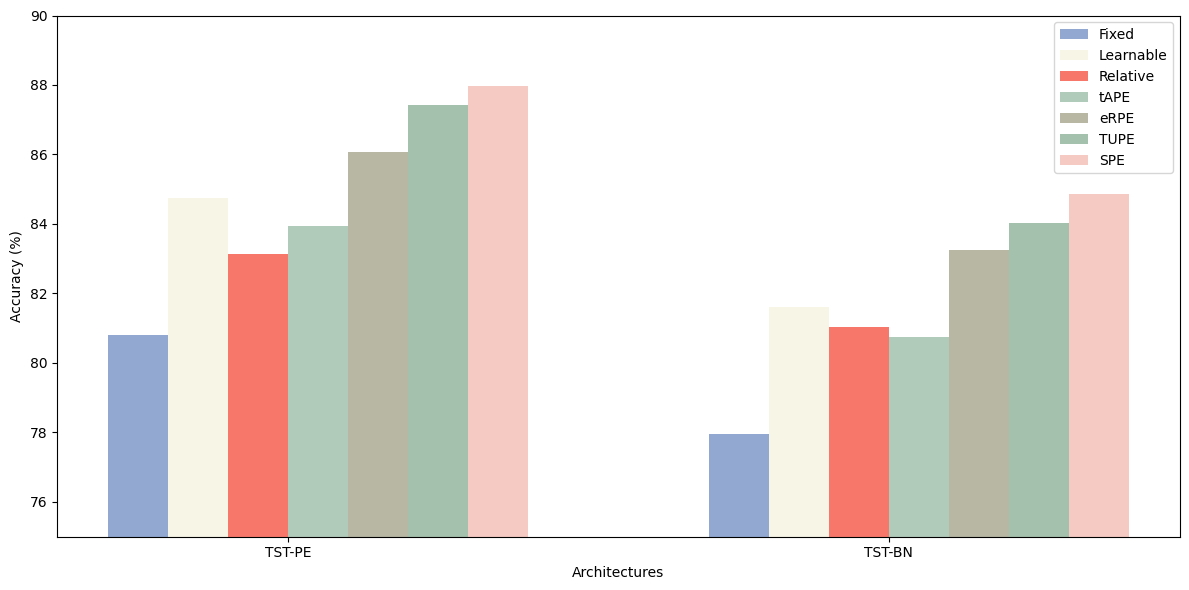

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusted hypothetical data from the table
datasets = ['TST-PE', 'TST-BN']
our_method_accuracy = [80.81, 77.96]
baseline_cnn_accuracy = [84.76, 81.62]
baseline_lstm_accuracy = [83.14, 81.03]
lstnet_accuracy = [83.93, 80.75]
lstnet_accuracy1 = [86.07, 83.24]
lstnet_accuracy2 = [87.41, 84.02]
lstnet_accuracy3 = [87.98, 84.86]





# Number of datasets
n_datasets = len(datasets)

# Setting the positions and width for the bars
pos = np.arange(n_datasets)
bar_width = 0.1

# Attractive color scheme
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
# colors = ['#d9d9d9', '#bdbdbd', '#969696', '#636363']  # Light Gray, Medium Gray, Dark Gray, Darker Gray
colors = ['#92a8d1', '#f7f5e6', '#f7786b', '#b1cbbb','#b7b7a4', '#a3c1ad', '#f5cac3']  # Powder Blue, Ivory, Blush, Mint

# Creating the bar graph with error bars
plt.figure(figsize=(12, 6))

plt.bar(pos - 2.5*bar_width, our_method_accuracy, bar_width, color=colors[0], capsize=5, label='Fixed')
plt.bar(pos - 1.5*bar_width, baseline_cnn_accuracy, bar_width, color=colors[1],  capsize=5, label='Learnable')
plt.bar(pos - 0.5*bar_width, baseline_lstm_accuracy, bar_width, color=colors[2],  capsize=5, label='Relative')
plt.bar(pos + 0.5*bar_width, lstnet_accuracy, bar_width, color=colors[3], capsize=5, label='tAPE')
plt.bar(pos + 1.5*bar_width, lstnet_accuracy1, bar_width, color=colors[4], capsize=5, label='eRPE')
plt.bar(pos + 2.5*bar_width, lstnet_accuracy2, bar_width, color=colors[5], capsize=5, label='TUPE')
plt.bar(pos + 3.5*bar_width, lstnet_accuracy3, bar_width, color=colors[6], capsize=5, label='SPE')

# Adding labels and title
plt.xlabel('Architectures')
plt.ylabel('Accuracy (%)')
plt.xticks(pos, datasets)
plt.legend()

# Adjusting y-axis to show a range of accuracies from 80% to 100%
plt.ylim(75, 90)

# Displaying the plot
plt.tight_layout()
plt.show()